Recall the 7-state model of the mammalian circadian clock published by Becker-Weimann et al. (2004). The paper investigates the relative contributions of positive and negative feedback to oscillator performance. We will be using the model presented in this paper for our final investigation. 

Your goal is to demonstrate your mastery of the topics in this course by understanding and analyzing this model. Each question relates to one topic.

## The Project

<ol>
<li> Kinetics and Motifs: Describe the kinetics used in this model. Be detailed. Be sure to include a discussion of gates (i.e. AND or OR gates). What is the basic network motif used in this model?
<li> Model Simulation: Write code to simulate the model using the published parameters. Follow the same coding conventions used for previous projects. Simulate the model and recreate Figure 3A of the paper.
    <li> Numerical Solvers: Using the <code>%timeit</code> magic code, compare the time it takes to simulate the model using RK23, RK45, DOP853, Radau, BDF, and LSODA (read the descriptions in the documentation for <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html">solve_ivp</a>). Use a relative tolerance of $10^{-8}$, the default absolute tolerance, an end ``time'' of at least 2400 hours, and no <code>t_eval</code> parameter. RK23 is a low-order explicit solver, RK45 is a high-order explicit solver, DOP853 is an even higher order explicit solver, BDF is a variable-order implicit solver, Radau is a high-order implicit solver, and LSODA is an all-purpose solver (it makes lots of adjustments while solving the problem). 
        <ol>
        <li>Do your run-times makes sense given these descriptions? Explain your answer. 
        <li>Examine how many steps the solver took (sol.t.size). How do they relate to the run times?
        <li>To answer the previous question, it is probably a good idea to re-run the timing with a relative tolerance of $10^{-3}$. This way, you can compare run-times and step counts based on tolerance.
        <li>From the relative differences in time, what can you conclude about the stiffness of the system? 
        </ol>
<li> Sensitivity Analysis: Perform a sensitivity analysis of the model. You may decide what you want to find the sensitivity to (the state trajectories, the period, the amplitude of a given state, etc.). Discuss any clear similarities or stark contrasts with the results from Leloup & Goldbeter's 2004 JTB paper.
</ol>

## Extensions

To receive a grade higher than a B+, you will want to include at least one extension. Here are a few possible extensions:

<ul>
<li> Apply the sensitivity analysis of Stelling et al (2004) to the mammalian model:
	<ul>
    	<li> Consolidate the sensitivity information using the vector 2-norm. In other words, from your three-dimensional matrix, extract the information for a given parameter, reshape it into a vector, and call Numpy's \lstinline!norm! function on it.  That gives each parameter a scalar sensitivity measure.
        <li>Rank the parameters from most to least sensitive. In keeping with the analysis of Stelling et al. the rank should be 0 for the most sensitive and 1 for the least sensitive. In other words, if parameter $i$ is the least sensitive, then its ``raw rank'' is 1 and if parameter $j$ is the most sensitive, then its raw rank is $N_p$ (where $N_p$ is the number of parameters). To convert from raw rank to rank, use
    <code>
    rank = (NP - raw_rank)/(NP-1);</code>
    <li> Can you come to the same conclusions about this model as Stelling et al. came to regarding the fly clock models?
    </ul>
<li>Solve the sensitivity ODEs. If you choose to do this, you may request instructions and the Jacobian code from Stephanie.
<li>Sample parameter space and perform sensitivity analysis at each of the new parameter sets (but only for those parameter sets that cause the system to oscillate). Compute the sensitivity rankings for each parameter set. Use them to produce a figure like Figure 2 by Stelling et al. (2004).
<li>Reproduce figures from Becker-Weimann et al (2004). Be sure to include a discussion of your approach and the meaning of the figure.
</ul>

### References

S Becker-Weimann, J Wolf, H Herzel, and A Kramer, "Modeling Feedback Loops of the Mammalian Circadian Oscillator", *Biophys. J.*, 2004

J Stelling, ED Gilles, and FJ Doyle III, "Robustness properties of circadian clock architectures", *Proc. Natl. Acad. Sci*, 2004

J-C Leloup and A Goldbeter, "Modeling the mammalian circadian clock: Sensitivity analysis and multiplicity of oscillatory mechanisms", *J. theor. Biol.*, 2004.

## Notes

To time the solvers, use the magic command %timeit. If you are running it for lots of tolerances and lots of methods, then it will probably be helpful to store the timing results in variables. The documentation about this feature of timeit is rather sparse, but I figured out how to get it to work as long as the only code in the cell is the code that calls the solver. Then, the cell immediately following it should assign the variable. e.g.

In the first cell
<code>
    %timeit -o sol = scipy.integrate.solve_ivp(fun=beckerWeimann_model, t_span=(0,10*24), y0=yinit, method='RK45', args=[params], rtol=1e-8 )
    </code>
    
and in the second cell, do the assignent from the special variable \_. Below, I show the code and then include print statements that will guide you in your understanding of that variable.
<code>
rk45_time = _    
print( rk45_time )
print( rk45_time.average )
print( rk45_time.stdev )    
</code>

Unfortunately, I am not sure how to have multiple calls in the same cell. But I think the variable is still useful  if you have a different variable name for each call, the you can put them in a list in a later cell, so that you can plot them all together.


### Model Details:
7-state model of Becker-Weimann (Becker-Weimann, Sabine, Jana Wolf, Hanspeter Herzel, and Achim Kramer. 2004. “Modeling Feedback Loops of the Mammalian Circadian Oscillator.” Biophysical Journal 87 (5): 3023–34. https://doi.org/10.1529/biophysj.104.040824.).

The parameters are
- v1b : maximal rate of Per2/Cry transcription
- k1b : activation threshold for Per2/Cry transcription
- k1i : inhibition constant of Per2/Cry transcription
- c: concentration of constituative activator
- p: Hill coefficient of inhibition of Per2/Cry transcription
- k1d: degradation rate of Per2/Cry mRNA
- k2b: complex formation rate of Per2/Cry mRNA
- q: Number of PER2/CRY complex forming subunits
- k2d: degradation rate of cytoplasmic PER2/CRY
- k2t: nuclear import rate of teh PER2/CRY complex
- k3t: nuclear export rate of teh PER2/CRY complex
- k3d: degradation rate of nuclear PER2/CRY
- v4b: maximal rate of Bmal1 transcription
- k4b : activation threshold for Bmal1 transcription
- r: Hill coefficient of activation of Bmal1 transcription
- k4d: degradation rate of Bmal1 mRNA
- k5b: translation rate of BMAL1
- k5d: degradation rate of cytoplasmic BMAL1
- k5t: nuclear import rate of BMAL1
- k6t: nuclear export rate of BMAL1
- k6d: degradation rate of nuclear BMAL1
- k6a: activation rate of nuclear BMAL1
- k7a: deactivation rate of nuclear BMAL1
- k7d: degradataion rate of nuclear BMAL1

The model is
\begin{eqnarray*}
\frac{dy1}{dt} &=& f_1 - k_{1d}\cdot y1\\
\frac{dy2}{dt} &=& k_{2b}\cdot y1^q - k_{2d}\cdot y2 - k_{2t}\cdot y2 + k_{3t}\cdot y3\\
\frac{dy3}{dt} &=& k_{2t}\cdot y2 - k_{3t}\cdot y3 - k_{3d}\cdot y3 \\
\frac{dy4}{dt} &=& f_2 - k_{4d}\cdot y4\\
\frac{dy5}{dt} &=& k_{5b}\cdot y4 - k_{5d}\cdot y5 - k_{5t}\cdot y5 + k_{6t}\cdot y6 \\
\frac{dy6}{dt} &=& k_{5t}\cdot y5 - k_{6t}\cdot y6 - k_{6d}\cdot y6 + k_{7a}\cdot y7 - k_{6a}\cdot y6\\
\frac{dy7}{dt} &=& k_{6a}\cdot y6 - k_{7a}\cdot y7 - k_{7d}\cdot y7\\
\end{eqnarray*}

where

\begin{equation*}
f_1 = \frac{v_{1b}\cdot(y7+c)}{k_{1b}\cdot(1+(y3/k_{1i})^p)+(y7+c)}
\end{equation*}
 
and

\begin{equation*}
f_2 = \frac{v_{4b}\cdot y3^r}{k_{4b}^r+y3^r}
\end{equation*}

### Kinetics and Motifs: 

This model uses linear and bilinear kinetics for the description of translation, degradation, complex formation, transport across the nuclear membrane, and post-translational modification. The model only considers activation by BMALI, because CLOCK is expressed as a constant level.
For Per genes, the authors of the paper have Per2 and Cry mRNAs and proteins represented by the same variables. The regulation terms, $f_1$ and $f_2$, are described by Hill functions implying switch-like behavior. However, the mechanics aren't like OR, AND, or SUM gates since the regulation terms are largely dependent on one variable.

For $f_2$, since the params are constant, it is easy to see that the value of $f_2$ is large if $y3^r$ is large and small if $y3^r$ is small.

$f_1$ is a little less straightforward, but if you take out all the constant variables in the function and simplify it to $\frac{ y7}{(y3)^p+(y7)}$, let p = 2, we see the following trend:

| y7  | y3  |  $f_1$ |
|---|---|---|
| large  |  large | small  |  
| large  | small  |  large |
|  small |  small | large  | 
| small  | large  |  small | 


$f_1$ being small means that it’s close to zero and $f_1$ being large means that it’s close to one. From this we can see that the outputs of $f_1$ is inversely related to y3. The value of y7 doesn’t really affect the output of $f_1$.

![network_motif.png](network_motif.png)
The network motif is that of two interlocked feedback loops, one positive (green) and one negative (red), in order to investigate the interdependence of the positive and negative feedback.

### Simulating the Model

In [1]:
import numpy as np
from scipy.signal import find_peaks
import scipy.integrate
import matplotlib.pyplot as plt


def bw_oscillator( t, statevars, params ):
    y1 = statevars[0];
    y2 = statevars[1];
    y3 = statevars[2];
    y4 = statevars[3];
    y5 = statevars[4];
    y6 = statevars[5];
    y7 = statevars[6];

    v1b = params[0] # maximal rate of Per2/Cry transcription
    k1b = params[1] # activation threshold for Per2/Cry transcription
    k1i = params[2] # inhibition constant of Per2/Cry transcription
    c = params[3] # concentration of constituative activator
    p = params[4] # Hill coefficient of inhibition of Per2/Cry transcription
    k1d = params[5] # degradation rate of Per2/Cry mRNA
    k2b = params[6] # complex formation rate of Per2/Cry mRNA
    q = params[7] # Number of PER2/CRY complex forming subunits
    k2d = params[8] # degradation rate of cytoplasmic PER2/CRY
    k2t = params[9] # nuclear import rate of teh PER2/CRY complex
    k3t = params[10] # nuclear export rate of teh PER2/CRY complex
    k3d = params[11] # degradation rate of nuclear PER2/CRY
    v4b = params[12] # maximal rate of Bmal1 transcription
    k4b = params[13] # activation threshold for Bmal1 transcription
    r = params[14] # Hill coefficient of activation of Bmal1 transcription
    k4d = params[15] # degradation rate of Bmal1 mRNA
    k5b = params[16] # translation rate of BMAL1
    k5d = params[17] # degradation rate of cytoplasmic BMAL1
    k5t = params[18] # nuclear import rate of BMAL1
    k6t = params[19] # nuclear export rate of BMAL1
    k6d = params[20] # degradation rate of nuclear BMAL1
    k6a = params[21] # activation rate of nuclear BMAL1
    k7a = params[22] # deactivation rate of nuclear BMAL1
    k7d = params[23] # degradataion rate of nuclear BMAL1
        
    dydt = np.zeros( (7,) )
    f1 = v1b * (y7 + c) / (k1b*(1+(y3/k1i)**p) + (y7+c))
    f2 = v4b* y3**r/(k4b**r+y3**r)

    dydt[0] = f1 - k1d*y1
    dydt[1] = k2b*y1**q - k2d*y2 - k2t*y2 + k3t*y3
    dydt[2] = k2t*y2 - k3t*y3 - k3d*y3
    dydt[3] = f2 - k4d* y4
    dydt[4] = k5b*y4 - k5d*y5 - k5t*y5 + k6t*y6
    dydt[5] = k5t*y5 - k6t*y6 - k6d*y6 + k7a*y7 - k6a*y6
    dydt[6] = k6a*y6 - k7a*y7 - k7d*y7

    return dydt

In [2]:
v1b = 9 # maximal rate of Per2/Cry transcription
k1b = 1 # activation threshold for Per2/Cry transcription
k1i = 0.56 # inhibition constant of Per2/Cry transcription
c = 0.01 # concentration of constituative activator
p = 8 # Hill coefficient of inhibition of Per2/Cry transcription
k1d = 0.12 # degradation rate of Per2/Cry mRNA
k2b = 0.3 # complex formation rate of Per2/Cry mRNA
q = 2 # Number of PER2/CRY complex forming subunits
k2d = 0.05 # degradation rate of cytoplasmic PER2/CRY
k2t = 0.24 # nuclear import rate of teh PER2/CRY complex
k3t = 0.02 # nuclear export rate of teh PER2/CRY complex
k3d = 0.12 # degradation rate of nuclear PER2/CRY
v4b = 3.6 # maximal rate of Bmal1 transcription
k4b = 2.16 # activation threshold for Bmal1 transcription
r = 3 # Hill coefficient of activation of Bmal1 transcription
k4d = 0.75 # degradation rate of Bmal1 mRNA
k5b = 0.24 # translation rate of BMAL1
k5d = 0.06 # degradation rate of cytoplasmic BMAL1
k5t = 0.45 # nuclear import rate of BMAL1
k6t = 0.06 # nuclear export rate of BMAL1
k6d = 0.12 # degradation rate of nuclear BMAL1
k6a = 0.09 # activation rate of nuclear BMAL1
k7a = 0.003 # deactivation rate of nuclear BMAL1
k7d = 0.09 # degradataion rate of nuclear BMAL1

params = (v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)

mf = lambda t,y : bw_oscillator(t,y, params)

sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                t_eval=np.arange(0,200,.1) )
sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,100), y0=sol1.y[:,-1], 
                                t_eval=np.arange(0,100,.1) )

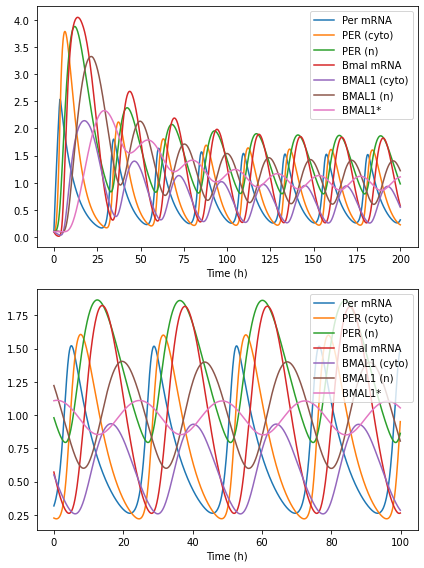

In [3]:
plt.figure(figsize=(6,8))
plt.subplot( 2, 1, 1)
plt.plot( sol1.t, sol1.y.T )
plt.xlabel( "Time (h)")
plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])
plt.subplot( 2, 1, 2 )
plt.plot( sol2.t, sol2.y.T )
plt.xlabel( "Time (h)")
plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])

plt.tight_layout()

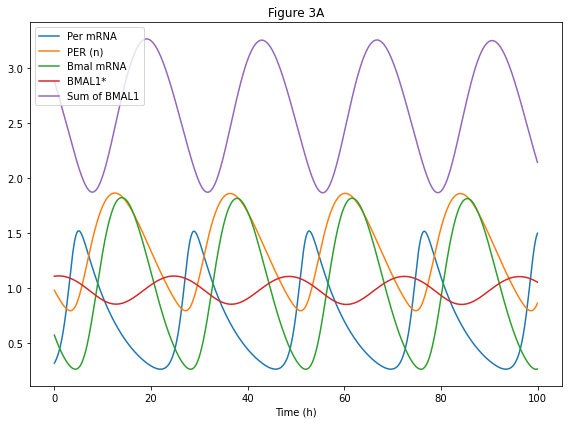

In [4]:
plt.figure(figsize=(8,6))
plt.plot(sol2.t, sol2.y[0].T)
plt.plot(sol2.t, sol2.y[2].T)
plt.plot(sol2.t, sol2.y[3].T)
plt.plot(sol2.t, sol2.y[6].T)
plt.plot(sol2.t, np.sum(sol2.y[4:7], axis=0).T)
plt.title("Figure 3A")
plt.xlabel( "Time (h)")
plt.legend( ['Per mRNA', 'PER (n)','Bmal mRNA', "BMAL1*", "Sum of BMAL1"])

plt.tight_layout()

### Analyzing Timing

In [5]:
rk23_1_time = %timeit -o rk23_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='RK23' )
rk23_2_time = %timeit -o rk23_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='RK23' )

rk45_1_time = %timeit -o rk45_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='RK45' )
rk45_2_time = %timeit -o rk45_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='RK45' )

dop853_1_time = %timeit -o dop853_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='DOP853' )
dop853_2_time = %timeit -o dop853_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='DOP853' )

radau_1_time = %timeit -o radau_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='Radau' )
radau_2_time = %timeit -o radau_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='Radau' )

bdf_1_time = %timeit -o bdf_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='BDF' )
bdf_2_time = %timeit -o bdf_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='BDF' )

lsoda_1_time = %timeit -o lsoda_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='LSODA' )
lsoda_2_time = %timeit -o lsoda_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='LSODA' )


1.32 s ± 41.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
99.9 ms ± 7.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
442 ms ± 22.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
110 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
358 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
182 ms ± 3.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.12 s ± 23.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
701 ms ± 6.63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.97 s ± 69.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
516 ms ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
260 ms ± 7.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
115 ms ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


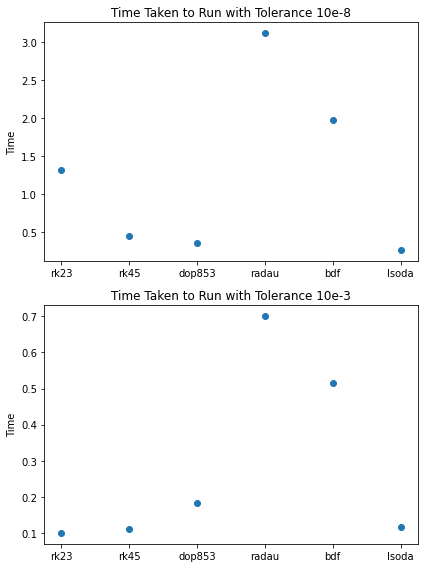

In [6]:
x = ["rk23", "rk45", "dop853", "radau", "bdf", "lsoda"]
y1 = [rk23_1_time.average, rk45_1_time.average, dop853_1_time.average, radau_1_time.average, bdf_1_time.average, lsoda_1_time.average]
y2 = [rk23_2_time.average, rk45_2_time.average, dop853_2_time.average, radau_2_time.average, bdf_2_time.average, lsoda_2_time.average]
plt.figure(figsize=(6,8))
plt.subplot( 2, 1, 1)
plt.scatter(x, y1 )
plt.ylabel("Time")
plt.title("Time Taken to Run with Tolerance 10e-8")
plt.subplot( 2, 1, 2 )
plt.scatter( x, y2 )
plt.ylabel("Time")
plt.title("Time Taken to Run with Tolerance 10e-3")
plt.tight_layout()

We observed that with both tolerance levels, Radau and BDF took the longest amount of time. LSODA seems to take the least time with the tolerance of 10e-8 while rk23 took the least time with the tolerance of 10e-3. In both tolerance levels, the explicit solvers and all-purpose solvers generally take significantly less time to solve compared to the implicit solvers.

In [7]:
rk23_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='RK23' )
rk23_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='RK23' )

rk45_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='RK45' )
rk45_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='RK45' )

dop853_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='DOP853' )
dop853_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='DOP853' )

radau_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='Radau' )
radau_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='Radau' )

bdf_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='BDF' )
bdf_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='BDF' )

lsoda_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='LSODA' )
lsoda_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='LSODA' )

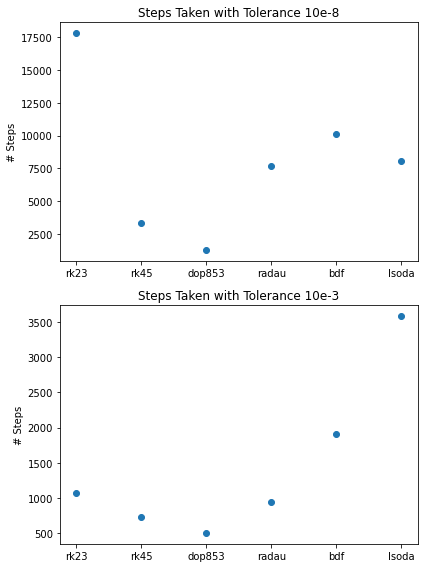

In [8]:
x = ["rk23", "rk45", "dop853", "radau", "bdf", "lsoda"]
y1 = [len(rk23_1_sol.t), len(rk45_1_sol.t), len(dop853_1_sol.t), len(radau_1_sol.t), len(bdf_1_sol.t), len(lsoda_1_sol.t)]
y2 = [len(rk23_2_sol.t), len(rk45_2_sol.t), len(dop853_2_sol.t), len(radau_2_sol.t), len(bdf_2_sol.t), len(lsoda_2_sol.t)]
plt.figure(figsize=(6,8))
plt.subplot( 2, 1, 1)
plt.scatter(x, y1 )
plt.ylabel("# Steps")
plt.title("Steps Taken with Tolerance 10e-8")
plt.subplot( 2, 1, 2 )
plt.scatter( x, y2 )
plt.ylabel("# Steps")
plt.title("Steps Taken with Tolerance 10e-3")
plt.tight_layout()

With a tolerance level of 10e-8, RK23 took the most steps, but with a tolerance of 10e-3,  LSODA took the most steps. However, with tolerance of 10e-8, RK23 took 17500 steps which was way higher than the second highest, BDF which took around 10000 steps and the third highest, LSODA, around 8200 steps. Radau is only slightly lower than LSODA. With tolerance of 10e-3, BDF had the second highest number of steps with RK23 being third and radau being a close fourth. It looks as though the low-order explicit solver tends to require way more steps with a higher tolerance level, and the higher order explicit solvers tend to take less steps than the implicit and all-purpose solvers. These figures also suggest that the system is not that stiff because the explicit methods don’t exhibit that much instability. With the exception of RK23, all the other explicit solvers generally took less steps than the implicit solvers.

### Analyzing Sensitivity

In [9]:
def sensitivity( fcn, ref_params, frac_change ):
    """
    fcn should be a handle to a function that takes a parameter set as input
        and returns a scalar as output.
    ref_params should be a 1D ndarray with the parameter set
    frac_change is the perturbation size, as a scale (i.e. the fraction by which you want to adjust the parameter by)
    """
    ref = fcn( ref_params );
    Srel = np.zeros((ref_params.size,));
    for i in range(ref_params.size):
        params = ref_params.copy();
        params[i] = (1+frac_change)*ref_params[i];
        output = fcn( params );
        Srel[i] = (output-ref)/frac_change;
    return Srel

In [10]:
def get_period(arr, t):
    
    peaks, _ = find_peaks(arr)
    time = []
    periods = []
    
    for peak in peaks:
        time.append(t[peak])
    
    for i in range(len(time)-1,0,-1):
        periods.append(time[i] - time[i-1])
        
    return np.mean(periods), np.std(periods)

def simulate_bw(params, t0=0, tStop=240, dt=0.1):
    
    mf = lambda t,y : bw_oscillator(t,y, params)

    sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                    t_eval=np.arange(0,200,.1) )
    sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,100), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(0,100,.1) )
    return sol2

def bw_period( params ):
    """ Simulate the Golbeter's model with the given parameters
        and return the period (a scalar) """
    sol = simulate_bw( params )
    (per,sdper) = get_period(sol.y[0,:], sol.t)
    return per

In [11]:
param_names = ["v1b", "k1b", "k1i", "c", "p", "k1d", "k2b", "q", "k2d", "k2t", "k3t", "k3d", "v4b", "k4b", "r", "k4d", "k5b", "k5d", "k5t", "k6t", "k6d", "k6a", "k7a", "k7d"]
pdict = {}
for i in range(len(param_names)):
    pdict[param_names[i]] = i
    
def get_indices_from_names(which_param_names):
    """ Given a list of names, use pdict to return a list of their indices.
    """
    idxs = []
    for pn in which_param_names:
        idxs.append(pdict[pn])

    return idxs

def plot_boxes(sens,which_param_names,ylab,title,showfliers=True):
    """ 
    Make a box plot of the sensitivities for just the given parameters.
    Use the given ylabel and title.
    sens is M x NP where NP is the number of parameters.
    which_param_names is a list of parameter names. 
    """
    plt.figure( figsize=(len(which_param_names)/2,4) )
    idxs = get_indices_from_names(which_param_names)
    plt.boxplot( sens[:,idxs], showfliers=showfliers );
    plt.axhline(color='gray')
    plt.xticks( ticks=np.arange(1,len(which_param_names)+1), labels=which_param_names);
    plt.ylabel( ylab )
    plt.title( title )

In [12]:
sol = simulate_bw(params)
per_y1 = get_period(sol.y[0,:], sol.t)[0]
per_y3 = get_period(sol.y[2,:], sol.t)[0]
per_y4 = get_period(sol.y[3,:], sol.t)[0]
per_y6 = get_period(sol.y[5,:], sol.t)[0]

In [13]:
periods_y1_1 = []
periods_y1_2 = []
periods_y3_1 = []
periods_y3_2 = []
periods_y4_1 = []
periods_y4_2 = []
periods_y6_1 = []
periods_y6_2 = []
for i in range(len(params)):
    tmp_params = np.array(params)
    tmp_params[i] = tmp_params[i]*1.05
    sol = simulate_bw(tmp_params)
    periods_y1_1.append(get_period(sol.y[0,:], sol.t)[0])
    periods_y3_1.append(get_period(sol.y[2,:], sol.t)[0])
    periods_y4_1.append(get_period(sol.y[3,:], sol.t)[0])
    periods_y6_1.append(get_period(sol.y[5,:], sol.t)[0])
    
for i in range(len(params)):
    tmp_params = np.array(params)
    tmp_params[i] = tmp_params[i]*1.3
    sol = simulate_bw(tmp_params)
    periods_y1_2.append(get_period(sol.y[0,:], sol.t)[0])
    periods_y3_2.append(get_period(sol.y[2,:], sol.t)[0])
    periods_y4_2.append(get_period(sol.y[3,:], sol.t)[0])
    periods_y6_2.append(get_period(sol.y[5,:], sol.t)[0])
    

Unpermutated Period: 23.833333333333332


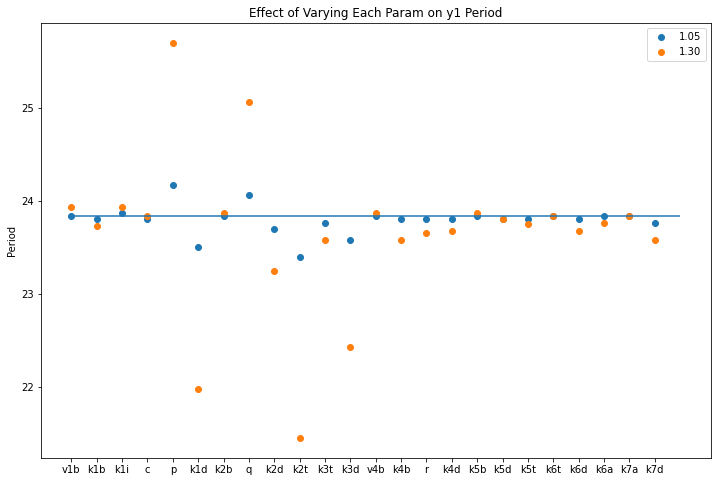

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(param_names, periods_y1_1 )
plt.scatter(param_names, periods_y1_2 )
plt.hlines(per_y1, 0, 24)
plt.ylabel("Period")
plt.title("Effect of Varying Each Param on y1 Period")
plt.legend(["1.05", "1.30"])
print(f"Unpermutated Period: {per_y1}")

Unpermutated Period: 23.833333333333332


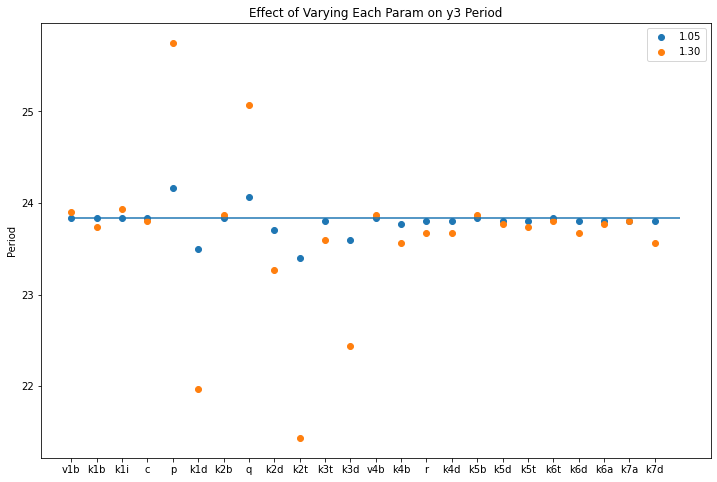

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(param_names, periods_y3_1 )
plt.scatter(param_names, periods_y3_2 )
plt.hlines(per_y3, 0, 24)
plt.ylabel("Period")
plt.title("Effect of Varying Each Param on y3 Period")
plt.legend(["1.05", "1.30"])
print(f"Unpermutated Period: {per_y3}")

Unpermutated Period: 23.833333333333332


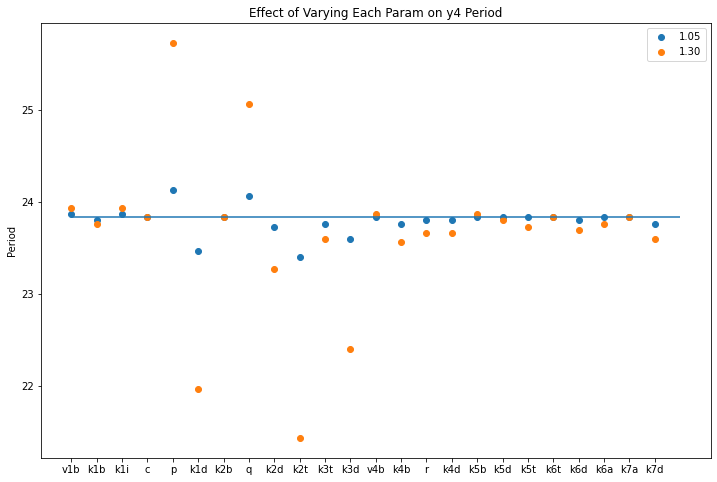

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(param_names, periods_y4_1 )
plt.scatter(param_names, periods_y4_2 )
plt.hlines(per_y4, 0, 24)
plt.ylabel("Period")
plt.title("Effect of Varying Each Param on y4 Period")
plt.legend(["1.05", "1.30"])
print(f"Unpermutated Period: {per_y4}")

Unpermutated Period: 23.8


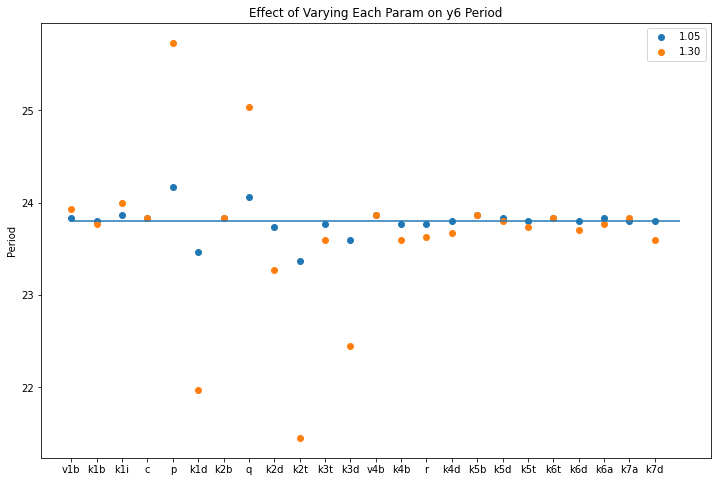

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(param_names, periods_y6_1 )
plt.scatter(param_names, periods_y6_2 )
plt.hlines(per_y6, 0, 24)
plt.ylabel("Period")
plt.title("Effect of Varying Each Param on y6 Period")
plt.legend(["1.05", "1.30"])
print(f"Unpermutated Period: {per_y6}")

We varied each param by multiplying it by 1.05 and 1.30 while leaving the other parameters unchanged and taking the period of the specified state variable. We plotted y1, y3, y4, and y6 to do a more thorough comparison but all of them generally have the unpermuted period of 23.8 and the variables that are the most sensitive are p, k1d, q, k2t, and k3d for all of them. Multiplying each param by 1.30 also seems to vary the period in the same direction as multiplication by 1.05, just with greater impact.
If we look at the effect of each variable:

p: increase causes effect of y3 in f_1 to increase, so increases y1

k1d: degradation rate, an increase decreases y1

q: increases effect of y1, increases y2

k2t: increases y3

k3d: degradation rate, an increase decreases y3

It looks like in general, y1 and y3 are most effected by parameter changes with y2 being the 3rd most effected.


<hr style="border:2px solid gray"> </hr>

Acknowledgements

*Replace this text with links to external resources and thanks to people you worked with.*